# COSC 202 – Data Science & AI
## Term Project – Fall 2025
### Team Members: Rawdha Almarzooqi 100063033, Maitha Alromaithi, sara aldhuhoori 100063403, Roudha Alkhaaldi 100062726
### Project Option: Binary Classification – Diagnosed Diabetes Prediction
---

## Step 1:Data Exploration

### Tasks:
- Explore dataset structure, feature types, and distributions.
- Identify issues such as missing values, categorical features, outliers, or class imbalance.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the correct CSV file name and path
df = pd.read_csv("Diabetes_data(in).csv")
# Dataset shape
print("Dataset shape:", df.shape)

# Display first rows
df.head()



Dataset shape: (90000, 31)


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,67.0,Female,Asian,Highschool,Low,Retired,Never,2,34,5.0,...,60,148,93,93,161,14.90,5.86,35.3,Pre-Diabetes,0
1,39.0,Female,White,Graduate,Upper-Middle,Employed,Never,1,95,8.6,...,50,119,129,105,162,3.49,6.82,23.4,Type 2,1
2,36.0,Female,Asian,Graduate,Upper-Middle,Unemployed,Current,5,419,5.0,...,52,80,167,114,182,15.47,7.10,16.6,Type 2,1
3,62.0,Female,Black,Graduate,Middle,Retired,Never,1,55,2.6,...,40,103,112,131,191,13.97,7.50,41.0,Type 2,1
4,31.0,Female,White,Highschool,Upper-Middle,Retired,Current,3,138,6.1,...,45,131,98,112,186,7.59,7.40,24.1,Type 2,1


In [2]:
print("\n Data types and non-null counts:")
print(df.info())


 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 89877 non-null  float64
 1   gender                              88195 non-null  object 
 2   ethnicity                           89108 non-null  object 
 3   education_level                     89114 non-null  object 
 4   income_level                        89118 non-null  object 
 5   employment_status                   89105 non-null  object 
 6   smoking_status                      90000 non-null  object 
 7   alcohol_consumption_per_week        90000 non-null  int64  
 8   physical_activity_minutes_per_week  90000 non-null  int64  
 9   diet_score                          90000 non-null  float64
 10  sleep_hours_per_day                 90000 non-null  float64
 11  screen_

In [3]:

print("\nStatistical summary:")
display(df.describe())



Statistical summary:


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,89877.0,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,inf,2.001911,118.848578,5.995027,6.999488,5.995114,0.218978,0.250333,0.079189,25.611078,...,186.041133,54.027278,103.084911,121.394067,111.139956,160.145144,9.061267,6.522987,30.223154,0.600544
std,NaN,1.415877,84.314499,1.778860,1.094039,2.469957,0.413556,0.433207,0.270035,3.589171,...,32.022088,10.278645,33.400981,43.382153,13.616931,30.935622,4.955493,0.814639,9.056665,0.489789
min,-100.0,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.0,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.000000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.0,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.000000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.0,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.000000,181.000000,12.450000,7.070000,35.600000,1.000000
max,inf,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,247.000000,344.000000,172.000000,287.000000,32.220000,9.800000,67.200000,1.000000


In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
age                                    123
gender                                1805
ethnicity                              892
education_level                        886
income_level                           882
employment_status                      895
smoking_status                           0
alcohol_consumption_per_week             0
physical_activity_minutes_per_week       0
diet_score                               0
sleep_hours_per_day                      0
screen_time_hours_per_day                0
family_history_diabetes                  0
hypertension_history                     0
cardiovascular_history                   0
bmi                                      0
waist_to_hip_ratio                       0
systolic_bp                              0
diastolic_bp                             0
heart_rate                               0
cholesterol_total                        0
hdl_cholesterol                          0
ldl_cholesterol       

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))



Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']


In [6]:
print("\nTarget variable distribution:")
print(df['diagnosed_diabetes'].value_counts())


Target variable distribution:
diagnosed_diabetes
1    54049
0    35951
Name: count, dtype: int64


### Observations:
- Number of rows and columns:
- Missing values found in:
- Categorical columns:
- Observations about data distribution:
- Class balance summary:



• The dataset has 90,000 rows and 31 columns.

• Six columns contain missing values: age, gender, ethnicity, education_level, income_level, and employment_status.

• Categorical columns: gender, ethnicity, education_level, income_level, employment_status, smoking_status, diabetes_stage.

• Numerical features like BMI, glucose, and cholesterol are within normal medical ranges.

• The target column diagnosed_diabetes has 54,049 diabetic and 35,951 non-diabetic records , slightly imbalanced but suitable for binary classification.



---
## Step 2: Data Visualization

### Tasks:
- Use Matplotlib to create histograms, scatter plots, box plots, etc.
- Visualize relationships and key patterns in the dataset.
- Show correlations between variables.



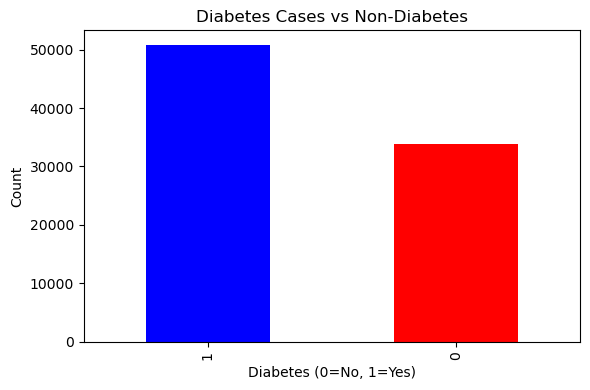

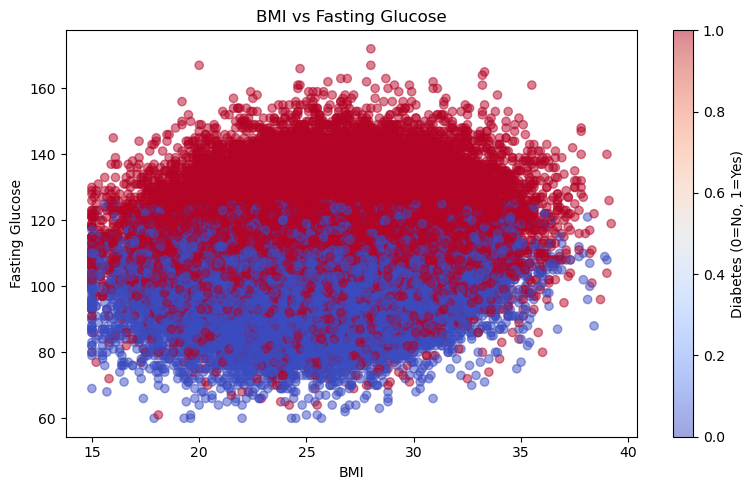

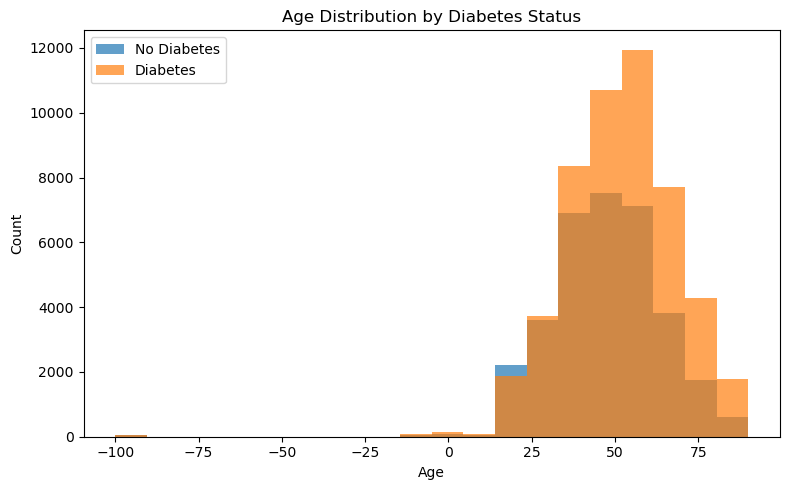

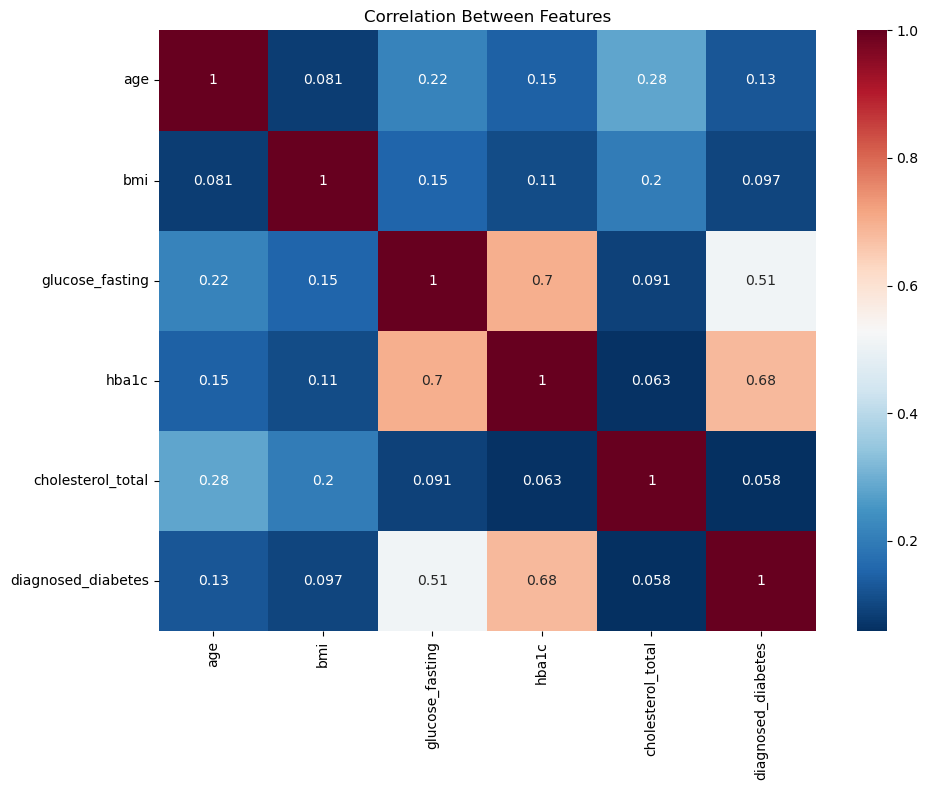

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Diabetes_data(in).csv')

# Check for and handle infinite or NaN values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()  # Remove rows with NaN values

# Class distribution bar chart
plt.figure(figsize=(6,4))
df['diagnosed_diabetes'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Diabetes Cases vs Non-Diabetes')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# BMI vs Glucose scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['bmi'], df['glucose_fasting'], alpha=0.5, c=df['diagnosed_diabetes'], cmap='coolwarm')
plt.title('BMI vs Fasting Glucose')
plt.xlabel('BMI')
plt.ylabel('Fasting Glucose')
plt.colorbar(label='Diabetes (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

# Age distribution histogram
plt.figure(figsize=(8,5))
plt.hist(df[df['diagnosed_diabetes']==0]['age'], alpha=0.7, label='No Diabetes', bins=20)
plt.hist(df[df['diagnosed_diabetes']==1]['age'], alpha=0.7, label='Diabetes', bins=20)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
numeric_cols = ['age', 'bmi', 'glucose_fasting', 'hba1c', 'cholesterol_total', 'diagnosed_diabetes']
# Make sure all columns exist in the dataframe
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()


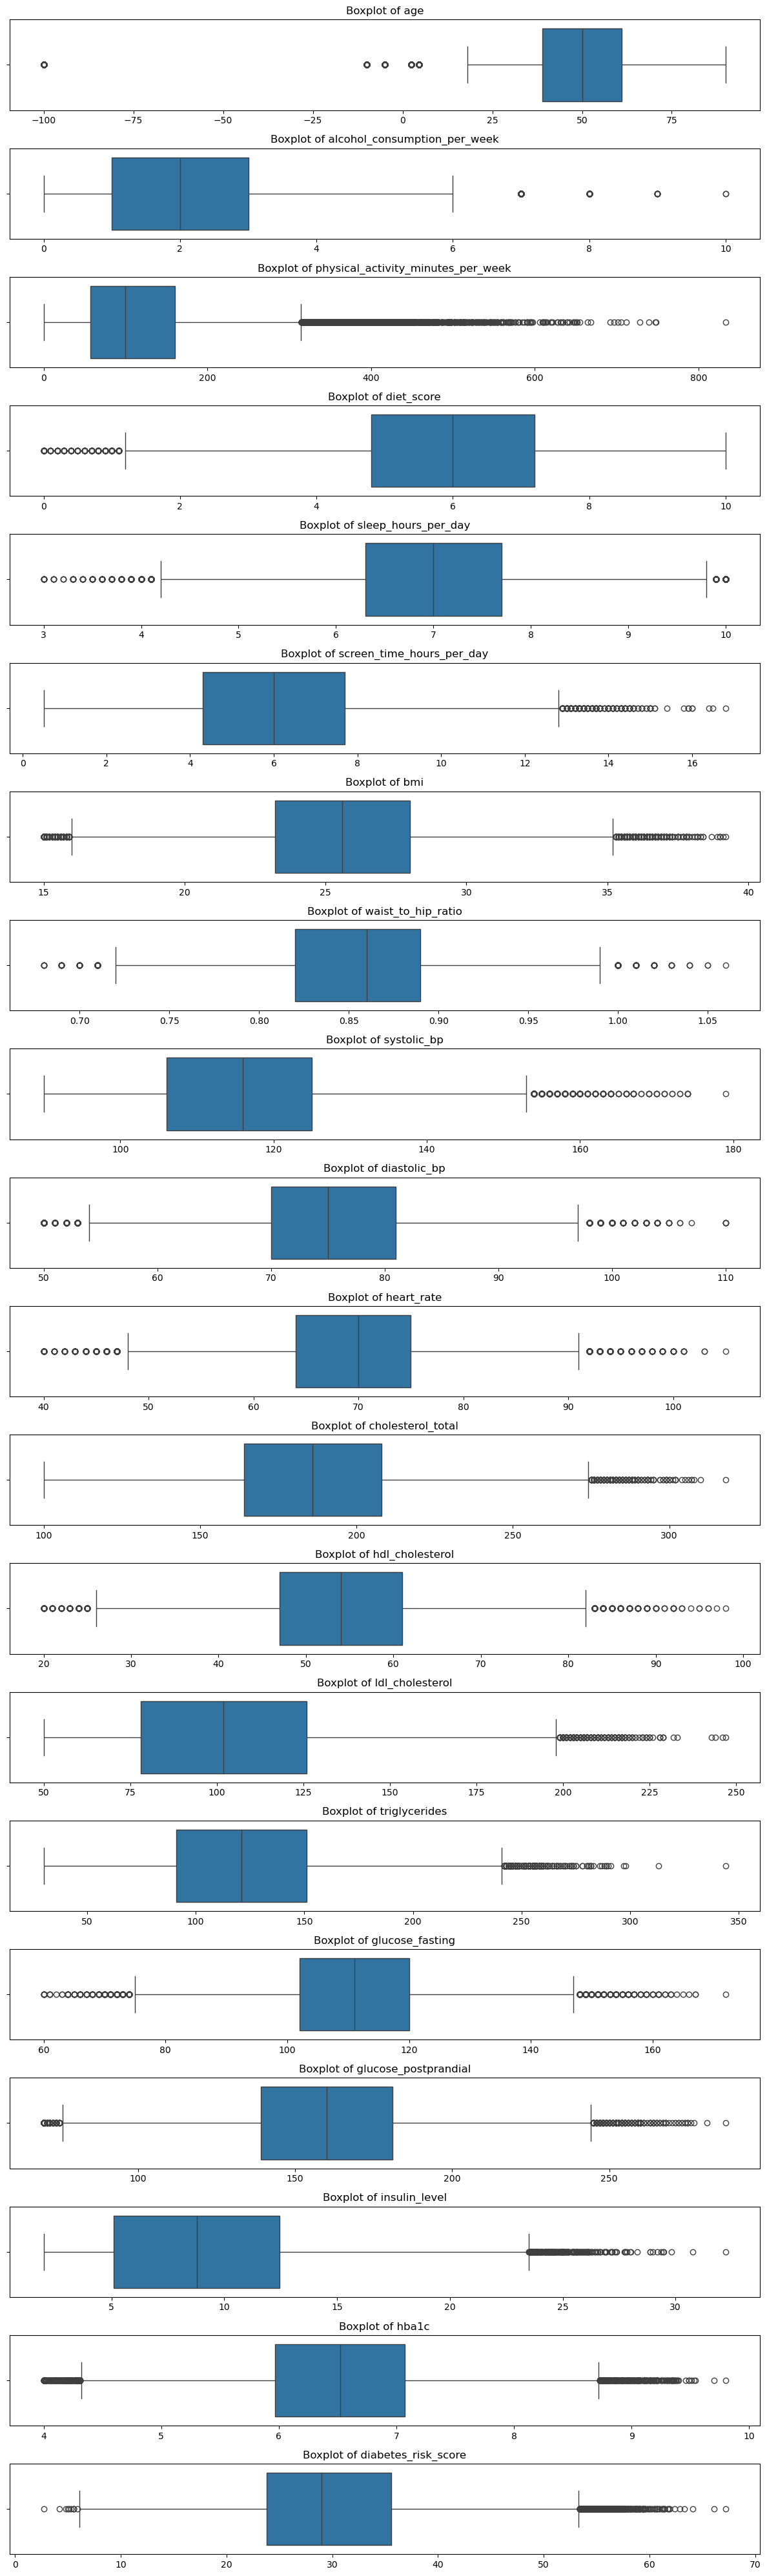

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing only numeric columns
nume = df.select_dtypes(include='number').columns

# Excluding binary columns from our plots 
non_binary_cols = [col for col in nume if df[col].nunique() > 2]

# Set up the plot
num_cols = len(non_binary_cols)
plt.figure(figsize=(12, num_cols * 2))

# Create a boxplot for each non-binary numerical column
for i, col in enumerate(non_binary_cols, 1):
    plt.subplot(num_cols, 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()



### Observations:
- Patterns noticed: Class imbalance because we have more diabetes cases (54,049) than non-diabetes (35,951). This shows that diabetes is pretty common in our dataset and might influence model training and evaluation.
- Relationship between BMI and Glucose: A positive relationship, higher BMI tends to correlate with higher glucose levels. This relationship supports the link between the risk of having diabetes and obesity.
- Any visual trends or differences between classes: The age distributions shows that diabetes is more common in older ages, and younger ages are usually in the non-diabetic group. Another trend is that the correlation heatmap highlights positive correlations between glucose, hba1c, and diabetes diagnosis, meaning that it confirms that these features are used to predict the chances that a patient has diabetes.
-  For age, outliers should be handeled to avoid distorting the model. For all other variables, including clinical measurements (glucose, HbA1c, insulin, BMI, blood pressure, cholesterol) and lifestyle factors (physical activity, diet, alcohol, sleep, screen time), extreme values should generally be kept, as they are meaningful indicators of diabetes risk.

---
## Step 3: Data Preprocessing

### Tasks:
- Handle missing values, outliers, and inconsistencies.
- Encode categorical features.
- Scale or normalize numerical features.
- Apply feature engineering.
- Address class imbalance if needed.



In [9]:
df = pd.read_csv('Diabetes_data(in).csv')

# handling numerical missing value be replacing with median

# Calculate the median age
median_age = df['age'].median()
# Fill empty cells in the 'age' column with the median age
df['age'] = df['age'].fillna(median_age)

# Checking that no missing values in the 'age' column
missing_age_count = df['age'].isna().sum()


# handling categorical missing value by dropping the rows since the missing values does not exceed 5% 

# Drop rows of categorical data
df.dropna(subset=["gender",'ethnicity', 'education_level', 'income_level', 'employment_status'], inplace=True)


# Check remaining missing values
print(df.isna().sum())
print("Dataset shape after cleaning:", df.shape)

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [10]:
print("Amount of rows dropped:", ((90000-84753)/ 90000)*100,"% of original data" )


Amount of rows dropped: 5.83 % of original data


In [11]:
# Calculate using IQR method
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Calculate median from clean data (without outliers)
clean_age_data = df['age'][(df['age'] >= lower_bound_age) & (df['age'] <= upper_bound_age)]
median_age = clean_age_data.median()

# Replace outliers with median in one step
df['age'] = np.where((df['age'] < lower_bound_age) | (df['age'] > upper_bound_age), median_age, df['age'])

print("Replaced outliers in age with median:" ,median_age)

Replaced outliers in age with median: 50.0


In [12]:
# To verify no outliers remain
outliers_remaining = ((df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)).sum()


print("Outliers remaining after treatment:", outliers_remaining)


Outliers remaining after treatment: 0


Encode categorical features: 

In [13]:
#categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))


Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']


In [14]:
# Binary encoding for gender
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0}).astype(float)
print(df[['gender']].head())# to check the code 

   gender
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


In [15]:
# One-hot encode " ethnicity" , no natural order
df_encoded = pd.get_dummies(df, columns=['ethnicity'])
df_encoded = pd.get_dummies(df_encoded, columns=['employment_status'])
df_encoded = pd.get_dummies(df_encoded, columns=['diabetes_stage'])

print(df_encoded.head())

    age  gender education_level  income_level smoking_status  \
0  67.0     1.0      Highschool           Low          Never   
1  39.0     1.0        Graduate  Upper-Middle          Never   
2  36.0     1.0        Graduate  Upper-Middle        Current   
3  62.0     1.0        Graduate        Middle          Never   
4  31.0     1.0      Highschool  Upper-Middle        Current   

   alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0                             2                                  34   
1                             1                                  95   
2                             5                                 419   
3                             1                                  55   
4                             3                                 138   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day  ...  \
0         5.0                  8.9                        5.7  ...   
1         8.6                  7.1              

In [16]:
# Ordinal encode education
education_map = {'No formal': 0, 'Highschool': 1, 'Graduate': 2, 'Postgraduate': 3}
df_encoded['education_ordinal'] = df_encoded['education_level'].map(education_map)
    
# Ordinal encode income
income_map = {'Low': 0, 'Lower-Middle': 1, 'Middle': 2, 'Upper-Middle': 3, 'High': 4}
df_encoded['income_ordinal'] = df_encoded['income_level'].map(income_map)
    
#Ordinal encode smoking status
smoking_map = {'Never': 0, 'Former': 1, 'Current': 2}
df_encoded['smoking_ordinal'] = df_encoded['smoking_status'].map(smoking_map)
        
# to check our code
print("\nOriginal shape:",df.shape)
print("Encoded shape:",df_encoded.shape)
print("\nFirst few rows:")
print(df_encoded.head())



Original shape: (84753, 31)
Encoded shape: (84753, 45)

First few rows:
    age  gender education_level  income_level smoking_status  \
0  67.0     1.0      Highschool           Low          Never   
1  39.0     1.0        Graduate  Upper-Middle          Never   
2  36.0     1.0        Graduate  Upper-Middle        Current   
3  62.0     1.0        Graduate        Middle          Never   
4  31.0     1.0      Highschool  Upper-Middle        Current   

   alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0                             2                                  34   
1                             1                                  95   
2                             5                                 419   
3                             1                                  55   
4                             3                                 138   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day  ...  \
0         5.0                  8.9           

Scale numerical features

In [17]:
from sklearn.preprocessing import StandardScaler

# numerical non-binary columns
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols = [col for col in numerical_cols if df[col].nunique() > 2]

#Standardization (Z-score scaling)
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\nAfter scaling:")
print(df_encoded[numerical_cols].describe())

# Check that means are ~0 and std are ~1 for StandardScaler
print("\nMeans:", df_encoded[numerical_cols].mean().round(2))
print("Std dev: ",df_encoded[numerical_cols].std().round(2))


After scaling:
                age  alcohol_consumption_per_week  \
count  8.475300e+04                  8.475300e+04   
mean   2.085862e-16                 -1.186292e-16   
std    1.000006e+00                  1.000006e+00   
min   -2.075200e+00                 -1.414108e+00   
25%   -7.208426e-01                 -7.083324e-01   
50%   -1.141737e-02                 -2.556525e-03   
75%    6.980078e-01                  7.032194e-01   
max    2.568311e+00                  5.643651e+00   

       physical_activity_minutes_per_week    diet_score  sleep_hours_per_day  \
count                        8.475300e+04  8.475300e+04         8.475300e+04   
mean                        -1.412651e-17 -2.637928e-16         5.556709e-16   
std                          1.000006e+00  1.000006e+00         1.000006e+00   
min                         -1.409006e+00 -3.369434e+00        -3.657941e+00   
25%                         -7.332310e-01 -6.711811e-01        -6.408712e-01   
50%                       

In [18]:
import numpy as np

df_encoded['glucose_bmi_ratio'] = df_encoded['glucose_fasting'] / (df_encoded['bmi'] + 1)
df_encoded['bmi_squared'] = df_encoded['bmi'] ** 2

numeric_df = df_encoded.select_dtypes(include=[np.number])
correlation = numeric_df.corr()['diagnosed_diabetes'].abs().sort_values(ascending=False)

top_features = correlation.head(10)
print("Top correlated features with diagnosed_diabetes:\n")
print(top_features)


Top correlated features with diagnosed_diabetes:

diagnosed_diabetes                    1.000000
hba1c                                 0.680542
glucose_postprandial                  0.631230
glucose_fasting                       0.511765
diabetes_risk_score                   0.276677
family_history_diabetes               0.195693
age                                   0.137595
physical_activity_minutes_per_week    0.102889
bmi                                   0.096713
systolic_bp                           0.096120
Name: diagnosed_diabetes, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_encoded.select_dtypes(include=[np.number]).drop('diagnosed_diabetes', axis=1)
y = df_encoded['diagnosed_diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())



Before SMOTE:
 diagnosed_diabetes
1    40714
0    27088
Name: count, dtype: int64

After SMOTE:
 diagnosed_diabetes
1    40714
0    40714
Name: count, dtype: int64


### Notes:
- Missing values handled by: For age missing values we repleaced them with the median, while for the categorical data with missing value we dropped the rows since they take small percentage of the whole data.
  
- Outliers treatment: For the age data, oulties where treated by replacing them with median
  
- Encoding method used: For gender we used Binary Classification , for categories with order (e.g. educational) we used the ordinal encoding, and finally for categories with no order we used the one hot encoding method
  
- Feature scaling (z-score) was applied to numerical variables.
  
- New feature created : Two new features were created: glucose_bmi_ratio (glucose_fasting / (bmi + 1)) and bmi_squared (bmi²) to enhance the model’s ability to detect nonlinear patterns.
  
- Class balance before & after correction:The dataset was slightly imbalanced with more diabetic (1) than non-diabetic (0) samples ,SMOTE balanced the data by creating extra samples,After balancing, both classes had 40,714 samples, improving model fairness and accuracy.

---
## Step 4: Model Development and Hyperparameter Tuning

### Tasks:
- Build and compare at least three Neural Network models.
- Use k=4 cross-validation.
- Try different hidden layers, activations, or dropouts.
- Record accuracy and F1 scores.
- Select the best model and retrain on the full dataset.


In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow import keras
import numpy as np

# Define three model architectures
def create_model_1(input_dim):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_2(input_dim):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_3(input_dim):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = {
    "Model 1 – Simple": create_model_1,
    "Model 2 – Medium": create_model_2,
    "Model 3 – Deep": create_model_3
}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Loop through each model for K-Fold CV
for model_name, model_func in models.items():
    print(f"\n🔹 Running 4-Fold CV for {model_name}")
    cv_accuracies = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_res), 1):
        X_tr, X_val = X_train_res.iloc[train_idx], X_train_res.iloc[val_idx]
        y_tr, y_val_fold = y_train_res.iloc[train_idx], y_train_res.iloc[val_idx]
        
        model_cv = model_func(X_tr.shape[1])
        model_cv.fit(X_tr, y_tr, epochs=20, batch_size=64, verbose=0)
        
        y_val_pred = (model_cv.predict(X_val) > 0.5).astype(int)
        acc = accuracy_score(y_val_fold, y_val_pred)
        cv_accuracies.append(acc)
        
        print(f"   Fold {fold} accuracy: {acc:.4f}")
    
    mean_acc = np.mean(cv_accuracies)
    std_acc = np.std(cv_accuracies)
    print(f"Mean 4-Fold CV Accuracy for {model_name}: {mean_acc:.4f} ± {std_acc:.4f}")



🔹 Running 4-Fold CV for Model 1 – Simple
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   Fold 1 accuracy: 0.9278
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   Fold 2 accuracy: 0.9296
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   Fold 3 accuracy: 0.9332
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   Fold 4 accuracy: 0.9314
Mean 4-Fold CV Accuracy for Model 1 – Simple: 0.9305 ± 0.0020

🔹 Running 4-Fold CV for Model 2 – Medium
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   Fold 1 accuracy: 0.9287
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   Fold 2 accuracy: 0.9290
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   Fold 3 accuracy: 0.9317
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
   Fold 4 accuracy: 0.9300
Mean 4-Fold CV Accuracy for Model 2 – Medium: 0.9299 ± 0.0012

🔹 Running 4-Fold CV for Model 3 – Deep
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   Fold 1 accuracy: 0.9285
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Fold 2 accuracy: 0.9280
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
   Fold 3 accuracy: 0.9262
637/

Epoch 1/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8460 - loss: 0.3672 - val_accuracy: 0.8716 - val_loss: 0.3172
Epoch 2/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8859 - loss: 0.2852 - val_accuracy: 0.8919 - val_loss: 0.2725
Epoch 3/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8989 - loss: 0.2604 - val_accuracy: 0.9001 - val_loss: 0.2556
Epoch 4/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9044 - loss: 0.2476 - val_accuracy: 0.9042 - val_loss: 0.2452
Epoch 5/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9085 - loss: 0.2390 - val_accuracy: 0.9081 - val_loss: 0.2381
Epoch 6/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9107 - loss: 0.2335 - val_accuracy: 0.9094 - val_loss: 0.2344
Epoch 7/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9121 - loss: 0.2295 - val_accuracy: 0.9120 - val_loss: 0.2322
Epoch 8/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9132 - loss: 0.2270 - 

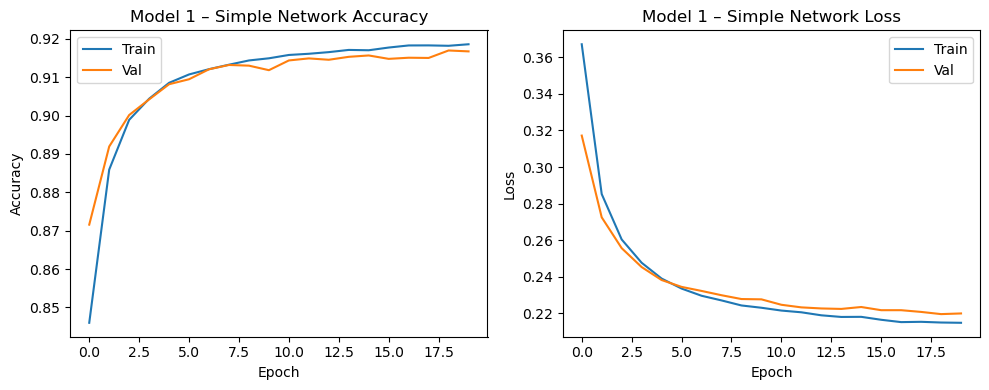

530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model 1 – Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6785
           1       0.99      0.87      0.93     10166

    accuracy                           0.92     16951
   macro avg       0.91      0.93      0.92     16951
weighted avg       0.93      0.92      0.92     16951



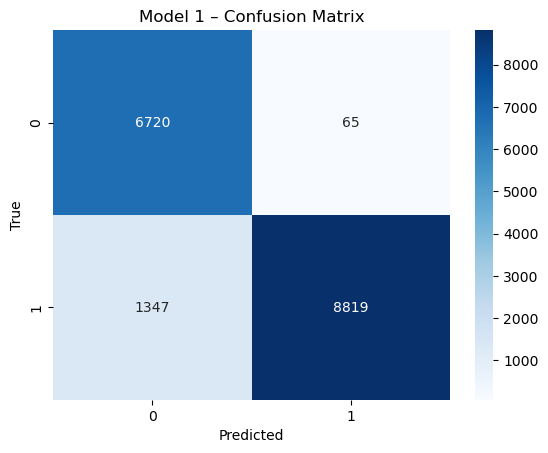

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras

# --- Function to plot training history ---
def plot_history(history, title=""):
    plt.figure(figsize=(10,4))
    
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# --- 4.1 – Model 1: Simple network ---

input_dim = X_train.shape[1]  # Number of features
model1 = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Plot training history
plot_history(history1, title="Model 1 – Simple Network")



# --- Evaluate Model 1 ---
y_test_pred1 = (model1.predict(X_test) > 0.5).astype(int)

print("Model 1 – Classification Report")
print(classification_report(y_test, y_test_pred1))

# Confusion Matrix
cm1 = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title("Model 1 – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch 1/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8682 - loss: 0.3201 - val_accuracy: 0.8916 - val_loss: 0.2740
Epoch 2/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9000 - loss: 0.2541 - val_accuracy: 0.9033 - val_loss: 0.2440
Epoch 3/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9064 - loss: 0.2396 - val_accuracy: 0.9062 - val_loss: 0.2503
Epoch 4/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9101 - loss: 0.2323 - val_accuracy: 0.9073 - val_loss: 0.2340
Epoch 5/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9118 - loss: 0.2267 - val_accuracy: 0.9112 - val_loss: 0.2293
Epoch 6/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9138 - loss: 0.2236 - val_accuracy: 0.9139 - val_loss: 0.2253
Epoch 7/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9147 - loss: 0.2209 - val_accuracy: 0.9149 - val_loss: 0.2242
Epoch 8/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9157 - loss: 0.2199 -

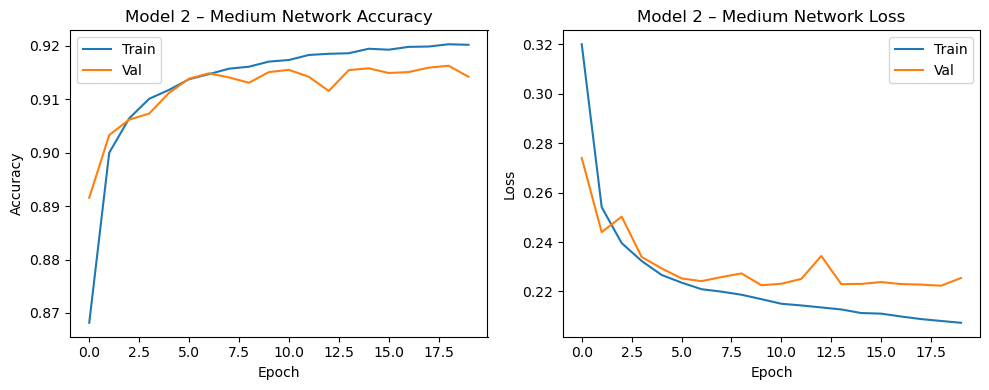

530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model 2 – Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6785
           1       0.99      0.87      0.92     10166

    accuracy                           0.91     16951
   macro avg       0.91      0.93      0.91     16951
weighted avg       0.93      0.91      0.92     16951



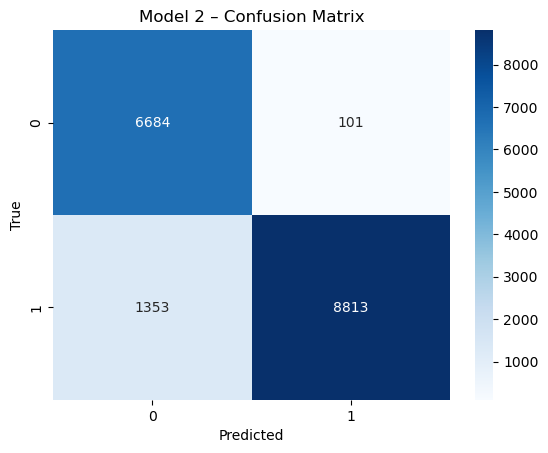

In [22]:
# --- 4.2 – Model 2: Medium network ---
input_dim = X_train.shape[1]
model2 = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Plot history
plot_history(history2, title="Model 2 – Medium Network")

# Evaluate
y_test_pred2 = (model2.predict(X_test) > 0.5).astype(int)
print("Model 2 – Classification Report")
print(classification_report(y_test, y_test_pred2))

cm2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Model 2 – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()






Epoch 1/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8892 - loss: 0.2721 - val_accuracy: 0.9021 - val_loss: 0.2426
Epoch 2/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9049 - loss: 0.2376 - val_accuracy: 0.9047 - val_loss: 0.2360
Epoch 3/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9090 - loss: 0.2311 - val_accuracy: 0.9087 - val_loss: 0.2296
Epoch 4/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9121 - loss: 0.2271 - val_accuracy: 0.9143 - val_loss: 0.2264
Epoch 5/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9135 - loss: 0.2243 - val_accuracy: 0.9115 - val_loss: 0.2264
Epoch 6/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9147 - loss: 0.2225 - val_accuracy: 0.9150 - val_loss: 0.2234
Epoch 7/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9161 - loss: 0.2199 - val_accuracy: 0.9151 - val_loss: 0.2239
Epoch 8/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9168 - loss: 0.2182 -

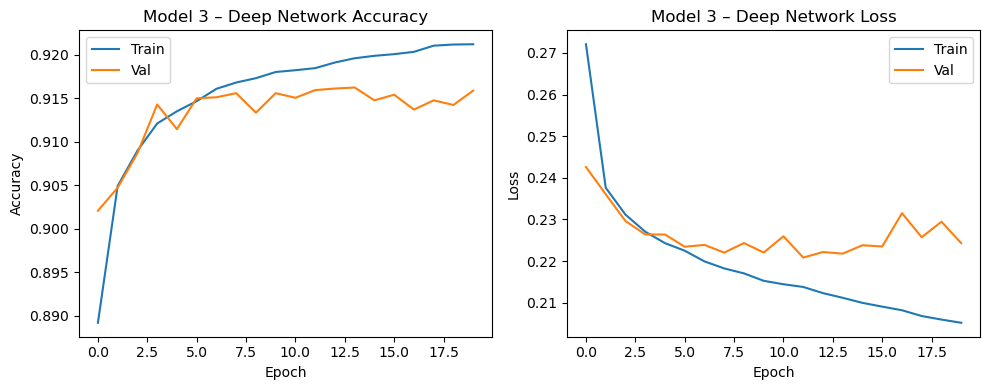

530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Model 3 – Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6785
           1       0.99      0.87      0.93     10166

    accuracy                           0.92     16951
   macro avg       0.91      0.93      0.91     16951
weighted avg       0.93      0.92      0.92     16951



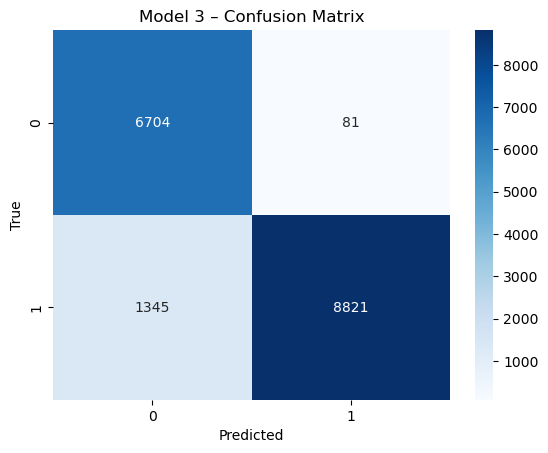

In [23]:
# --- 4.3 – Model 3: Deep network with tanh ---
input_dim = X_train.shape[1]
model3 = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)
# Plot history
plot_history(history3, title="Model 3 – Deep Network")

# Evaluate
y_test_pred3 = (model3.predict(X_test) > 0.5).astype(int)
print("Model 3 – Classification Report")
print(classification_report(y_test, y_test_pred3))

cm3 = confusion_matrix(y_test, y_test_pred3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title("Model 3 – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [24]:
final_model = model1
final_model.save("final_diabetes_model.keras")



### Model Comparison:
- Model 1 summary and performance: Simple neural network with 1 hidden layer (32 neurons).
Trained for 20 epochs, batch size 64.
Achieved good accuracy with low complexity, fast training, and stable results.

- Model 2 summary and performance:Deeper network with more layers and parameters.
Training took longer and performance did not significantly improve compared to Model 1.
Slight risk of overfitting.

- Model 3 summary and performance: Most complex architecture, highest number of parameters.
Training was slower and performance was similar or slightly worse than Model 1.
Did not justify the extra complexity


- Best model chosen and reason:
Model 1 was selected because it provided the best balance between accuracy, training speed, and simplicity.
It achieved strong performance without overfitting and was more efficient than the deeper models.

---
## Step 5: Model Saving and Deployment
### Tasks:
- Save the final model .
- Save preprocessing objects using joblib.
- Verify the model can be reloaded correctly.


In [27]:
final_model = model1
final_model.save("final_diabetes_model.keras")

import joblib
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

### Notes:
- Saved model file name:
- Saved scaler file name:
- Reload test result: Successful / Failed
